In [3]:
cd("$(homedir())/OneDrive/Documents/GitHub/enso_project.jl")

In [4]:
using Pkg
Pkg.activate(".")
Pkg.add("DynamicalSystems")

  Activating project at `C:\Users\Andrea\OneDrive\Documents\GitHub\enso_project.jl`
   Resolving package versions...
   Installed Libmount_jll ────────────── v2.40.3+0
   Installed Xorg_xkbcomp_jll ────────── v1.4.6+1
   Installed JpegTurbo_jll ───────────── v3.1.1+0
   Installed LERC_jll ────────────────── v4.0.1+0
   Installed GR_jll ──────────────────── v0.73.13+0
   Installed InlineStrings ───────────── v1.4.3
   Installed Unitful ─────────────────── v1.22.0
   Installed Xorg_libpthread_stubs_jll ─ v0.1.2+0
   Installed ConcurrentUtilities ─────── v2.5.0
   Installed InvertedIndices ─────────── v1.3.1
   Installed Fontconfig_jll ──────────── v2.15.0+0
   Installed Libgpg_error_jll ────────── v1.51.1+0
   Installed HTTP ────────────────────── v1.10.15
   Installed Xorg_libxkbfile_jll ─────── v1.1.2+1
   Installed Xorg_libXinerama_jll ────── v1.1.5+0
   Installed Xorg_libXau_jll ─────────── v1.0.12+0
   Installed Pango_jll ───────────────── v1.56.1+0
   Installed EpollShim_jll ──────

In [12]:
using DataFrames, CSV, Plots, Dates, DynamicalSystems

1D Time Series

In [13]:
soi_1D = CSV.read("c:/Users/Andrea/OneDrive/Documents/GitHub/enso_project.jl/data/soi_standardized_format.csv", DataFrame)

Row,DATE,SOI
,Date,Float64
1,1951-01-01,1.5
2,1951-02-01,0.9
3,1951-03-01,-0.1
4,1951-04-01,-0.3
5,1951-05-01,-0.7
6,1951-06-01,0.2
7,1951-07-01,-1.0
8,1951-08-01,-0.2
9,1951-09-01,-1.1


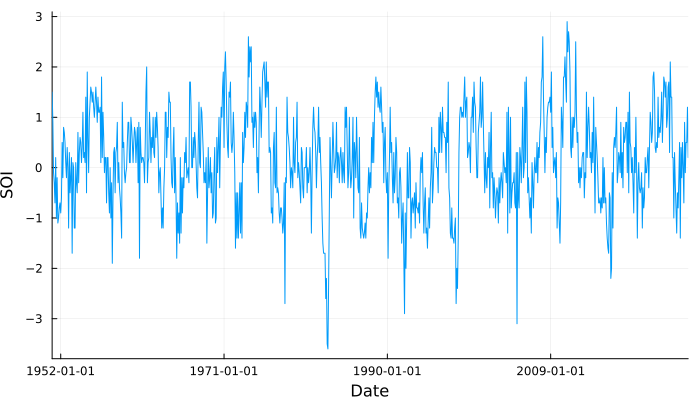

In [26]:
xs = soi_1D[:,"DATE"]
ys = soi_1D[:, "SOI"]
plot(xs, ys, xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "SOI", legend = false, size = (700,400))

Time Delay Embedding

In [37]:
D, τ, E = optimal_traditional_de(ys) 

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.
Stochastic signal, valid embedding NOT achieved ⨉.


(7-dimensional StateSpaceSet{Float64} with 871 points, 3, [NaN, NaN, NaN, 0.0, 0.778945910990251, 0.8727311746115006, 0.9228006297690786, 0.950127461455743, 0.9597241041516414, 0.9653962363564975])

with default settings the stochastic test turned out to be true suggesting that the time series is contaminated with noise

In [38]:
# adjust default stoch_thres=0.1 (or fnn_thres=0.05 if not default afnn method is used) according to the noise level
D, τ, E = optimal_traditional_de(ys, stoch_thres = 0.08)

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


(7-dimensional StateSpaceSet{Float64} with 871 points, 3, [NaN, NaN, NaN, 0.0, 0.778945910990251, 0.8727311746115006, 0.9228006297690786, 0.950127461455743, 0.9597241041516414, 0.9653962363564975])

In [47]:
D

7-dimensional StateSpaceSet{Float64} with 871 points
  1.5  -0.3  -1.0  -1.0  -0.9  -0.2   0.5
  0.9  -0.7  -0.2  -0.8  -0.6   0.8   0.1
 -0.1   0.2  -1.1  -0.7   0.5   0.7  -0.2
 -0.3  -1.0  -1.0  -0.9  -0.2   0.5   0.4
 -0.7  -0.2  -0.8  -0.6   0.8   0.1   0.0
  0.2  -1.1  -0.7   0.5   0.7  -0.2  -1.2
 -1.0  -1.0  -0.9  -0.2   0.5   0.4   0.3
 -0.2  -0.8  -0.6   0.8   0.1   0.0  -0.5
 -1.1  -0.7   0.5   0.7  -0.2  -1.2  -0.2
 -1.0  -0.9  -0.2   0.5   0.4   0.3   0.2
  ⋮                             ⋮    
  0.3   1.4  -1.0  -0.8  -0.8  -1.4   0.5
  2.1   0.2   0.3  -1.3  -0.2   0.4   0.0
  1.4   0.2  -0.3  -0.5   0.5  -0.2  -0.7
  1.4  -1.0  -0.8  -0.8  -1.4   0.5   0.9
  0.2   0.3  -1.3  -0.2   0.4   0.0  -0.1
  0.2  -0.3  -0.5   0.5  -0.2  -0.7   0.5
 -1.0  -0.8  -0.8  -1.4   0.5   0.9   0.5
  0.3  -1.3  -0.2   0.4   0.0  -0.1   1.2
 -0.3  -0.5   0.5  -0.2  -0.7   0.5   0.2

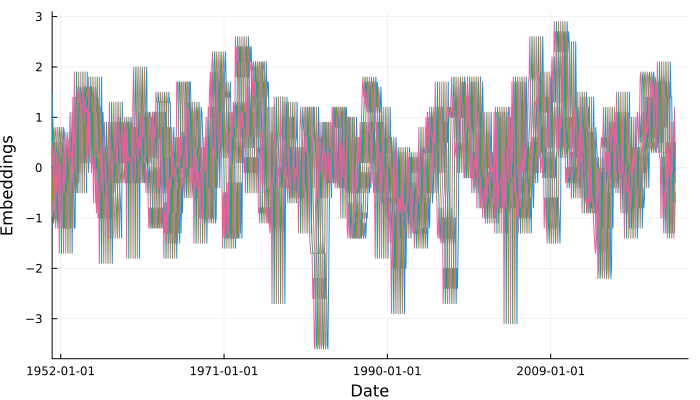

In [56]:
plot(xs[1:871], [D[:,1] D[:,2] D[:,3] D[:,4] D[:,5] D[:,6] D[:,7]], xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "Embeddings", legend = false, size = (700,400))